In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [33]:
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))

top_20_ID = pd.read_csv('../../Data/따릉이/쏠림정도_top20_대여소.csv',encoding='utf-8')

3385613


In [45]:
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3385608,2023-08-29,1610,ST-2056,ST-2993,4,30,2837,1,0,0
3385609,2023-08-29,1705,ST-1712,ST-2045,4,16,3487,1,0,0
3385610,2023-08-29,2330,ST-513,ST-2482,4,26,3464,1,0,0
3385611,2023-08-29,830,ST-1506,ST-3068,5,26,4519,1,0,0


In [35]:
top_20_ID

,Unnamed: 0,최종용도,대여소_ID,temp_num,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,차이절대값합
0,0,상업,ST-1064,180,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,8168
1,1,상업,ST-1688,188,881,7017,-6136,6136,7898,7922,3320,4602,4602,11242,19140,10738
2,2,상업,ST-1712,193,698,11208,-10510,10510,11906,7548,754,6794,6794,8302,20208,17304
3,3,상업,ST-2031,182,18661,22323,-3662,3662,40984,27533,22552,4981,4981,50085,91069,8643
4,4,상업,ST-2033,195,927,17721,-16794,16794,18648,14171,3574,10597,10597,17745,36393,27391
5,5,상업,ST-2035,194,1306,13073,-11767,11767,14379,10752,3553,7199,7199,14305,28684,18966
6,6,상업,ST-2044,190,1911,11044,-9133,9133,12955,6995,1434,5561,5561,8429,21384,14694
7,7,상업,ST-2569,176,889,4972,-4083,4083,5861,4068,1503,2565,2565,5571,11432,6648
8,8,상업,ST-2871,186,5501,10328,-4827,4827,15829,10568,6131,4437,4437,16699,32528,9264
9,9,상업,ST-2945,177,1201,6098,-4897,4897,7299,5019,2183,2836,2836,7202,14501,7733


In [36]:
# 주거와 상업으로 데이터 분할
주거_df = top_20_ID[top_20_ID['최종용도'] == '주거']
상업_df = top_20_ID[top_20_ID['최종용도'] == '상업']

In [37]:
# 주거 데이터에서 대여소_ID 추출
주거_IDs = 주거_df['대여소_ID'].unique()

# 상업 데이터에서 대여소_ID 추출
상업_IDs = 상업_df['대여소_ID'].unique()

# 강서 데이터에서 대여소_ID가 주거 데이터에 있는 것만 추출
주거_강서_df = 강서_데이터[강서_데이터['시작_대여소_ID'].isin(주거_IDs)]

# 강서 데이터에서 대여소_ID가 상업 데이터에 있는 것만 추출
상업_강서_df = 강서_데이터[강서_데이터['시작_대여소_ID'].isin(상업_IDs)]

In [38]:
주거_IDs

array(['ST-1253', 'ST-1352', 'ST-1645', 'ST-2050', 'ST-2056', 'ST-2557',
       'ST-2965'], dtype=object)

In [39]:
주거_강서_df = 주거_강서_df.sort_values(by='기준_날짜')
상업_강서_df = 상업_강서_df.sort_values(by='기준_날짜')


In [54]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1700:
        return '10:00~17:00'
    elif time < 2100:
        return '17:00~21:00' # 퇴근시간
    else:
        return '21:00~24:00'
    
주거_강서_df['시간대_구간'] = 주거_강서_df['기준_시간대'].apply(divide_time_range)


상업_강서_df['시간대_구간'] = 상업_강서_df['기준_시간대'].apply(divide_time_range)


In [47]:
주거_강서_df[주거_강서_df['시간대_구간']== '17:00~21:00' ]

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,시간대_구간
1612630,2023-04-03,2055,ST-1352,ST-2047,2,17,2843,0,0,0,17:00~21:00
1608882,2023-04-03,1910,ST-2557,ST-2557,1,26,3485,0,0,0,17:00~21:00
1608911,2023-04-03,1915,ST-1352,ST-524,1,12,1989,0,0,0,17:00~21:00
1608917,2023-04-03,1915,ST-1645,ST-2489,1,16,3300,0,0,0,17:00~21:00
1609001,2023-04-03,1920,ST-1253,ST-1065,1,10,1630,0,0,0,17:00~21:00
...,...,...,...,...,...,...,...,...,...,...,...
3294677,2024-03-29,1905,ST-2056,ST-2884,1,6,671,4,0,0,17:00~21:00
3294686,2024-03-29,1905,ST-2557,ST-1714,2,23,3309,4,0,0,17:00~21:00
3294687,2024-03-29,1905,ST-2557,ST-530,1,10,1686,4,0,0,17:00~21:00
3294763,2024-03-29,1910,ST-2056,ST-1694,1,7,1144,4,0,0,17:00~21:00


In [50]:
주거_강서_df1 = 주거_강서_df[주거_강서_df['시간대_구간'] == '06:00~10:00']
주거_강서_df2 = 주거_강서_df[주거_강서_df['시간대_구간'] == '17:00~21:00']
# 전체 파일에서 1차 전처리 (집계_기준 2개 -> 1개로 줄임, 사용량 =0)
주거_강서_df1 = 주거_강서_df1[(주거_강서_df1['전체_이용_분'] != 0) & (주거_강서_df1['전체_이용_거리'] != 0)]
주거_강서_df2 = 주거_강서_df2[(주거_강서_df2['전체_이용_분'] != 0) & (주거_강서_df2['전체_이용_거리'] != 0)]

In [51]:
주거_강서_df2

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,시간대_구간
1612630,2023-04-03,2055,ST-1352,ST-2047,2,17,2843,0,0,0,17:00~21:00
1608882,2023-04-03,1910,ST-2557,ST-2557,1,26,3485,0,0,0,17:00~21:00
1608911,2023-04-03,1915,ST-1352,ST-524,1,12,1989,0,0,0,17:00~21:00
1608917,2023-04-03,1915,ST-1645,ST-2489,1,16,3300,0,0,0,17:00~21:00
1609001,2023-04-03,1920,ST-1253,ST-1065,1,10,1630,0,0,0,17:00~21:00
...,...,...,...,...,...,...,...,...,...,...,...
3294677,2024-03-29,1905,ST-2056,ST-2884,1,6,671,4,0,0,17:00~21:00
3294686,2024-03-29,1905,ST-2557,ST-1714,2,23,3309,4,0,0,17:00~21:00
3294687,2024-03-29,1905,ST-2557,ST-530,1,10,1686,4,0,0,17:00~21:00
3294763,2024-03-29,1910,ST-2056,ST-1694,1,7,1144,4,0,0,17:00~21:00


In [15]:
grouped_data = 주거_강서_df1.groupby(['기준_날짜', '시작_대여소_ID'])['전체_건수'].sum().reset_index()
print(grouped_data)

           기준_날짜 시작_대여소_ID  전체_건수
0     2023-04-03   ST-1253     27
1     2023-04-03   ST-1352     56
2     2023-04-03   ST-1645     70
3     2023-04-03   ST-2056     61
4     2023-04-03   ST-2557     49
...          ...       ...    ...
1637  2024-03-29   ST-1645     62
1638  2024-03-29   ST-2050     75
1639  2024-03-29   ST-2056     46
1640  2024-03-29   ST-2557     57
1641  2024-03-29   ST-2965     58

[1642 rows x 3 columns]


In [16]:
len(주거_IDs)

7

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = []
# ARIMA 모델 학습 및 예측 함수
def check_best_arima(data):
    for i in range(1,6) : 
        for j in range(1,3) :
            for k in range(1,3) : 
                model = ARIMA(data, order=(i,j,k))  # ARIMA(p,d,q) 모델 설정1
                model_fit = model.fit()
                # 예측 결과 출력
                print(model_fit.summary())  


def arima_forecast(data):
    plot_acf(data)
    plot_pacf(data)
    plt.show()
     
    #ARIMA 모델 학습
    # ARIMA 모델 학습
    model = ARIMA(data, order=(1,1,0))  # ARIMA(p,d,q) 모델 설정1
    model_fit = model.fit()

    # 다음 시간대의 예측값 계산
    forecast = model_fit.forecast(steps=1)[0]
    
    # 예측 결과 출력
    print(model_fit.summary())

     #시각화
    #plt.figure(figsize=(10, 6))
    #plt.plot(data.index, data.values, label='Actual')
    #plt.plot(data.index, model_fit.predict(start=0, ensd=len(data)-1), label='Predicted', color='red')
    #plt.title('Actual vs. Predicted Bike Counts')
    #plt.xlabel('Date')
    #plt.ylabel('Bike Count')
    #plt.legend()
    #plt.grid(True)
    #plt.show()
    
    return forecast

def arima_test(data, IDS) : 
# 주거 대여소의 시계열 분석
for 주거_ID in 주거_IDs:
    
    # 해당 주거 대여소의 데이터 추출
    주거_data = 주거_강서_df1[주거_강서_df1['시작_대여소_ID'] == 주거_ID]

    # 기준_날짜를 날짜형 데이터로 변환
    주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])

    # 기준_날짜를 인덱스로 설정하고 일별로 집계
    주거_data.set_index('기준_날짜', inplace=True)
    arima_data = 주거_data.resample('D')['전체_건수'].sum()  # 일별 전체_건수 합계 집계

    # ARIMA 모델을 통한 예측
    forecast = arima_forecast(arima_data)
    result.append(forecast)
    print(f"대여소 {주거_ID}의 다음 시간대 예측값: {forecast}")

                               SARIMAX Results                                
Dep. Variable:                  전체_건수   No. Observations:                  362
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1754.964
Date:                Wed, 08 May 2024   AIC                           3513.929
Time:                        00:02:13   BIC                           3521.707
Sample:                    04-03-2023   HQIC                          3517.021
                         - 03-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0956      0.076     -1.255      0.210      -0.245       0.054
sigma2       978.8890     73.276     13.359      0.000     835.270    1122.508
Ljung-Box (L1) (Q):                   0.17   Jarque-

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61180\1473983466.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61180\1473983466.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ciw96\AppData\Local\Temp\ipykernel_61180\1473983466.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:

def arima_test(data, IDs) : 
    for 주거_ID in IDs:
        
        # 해당 주거 대여소의 데이터 추출
        주거_data = data[data['시작_대여소_ID'] == 주거_ID]

        # 기준_날짜를 날짜형 데이터로 변환
        주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])

        # 기준_날짜를 인덱스로 설정하고 일별로 집계
        주거_data.set_index('기준_날짜', inplace=True)
        arima_data = 주거_data.resample('D')['전체_건수'].sum()  # 일별 전체_건수 합계 집계

        # ARIMA 모델을 통한 예측
        forecast = arima_forecast(arima_data)
        result.append(forecast)
        print(f"대여소 {주거_ID}의 다음 시간대 예측값: {forecast}")

In [19]:
주거_check=주거_강서_df1[주거_강서_df1['시작_대여소_ID']=='ST-1352'].groupby('기준_날짜')['전체_건수'].sum()

In [20]:
주거_check_df = 주거_check.to_frame()
주거_check_df.reset_index(inplace=True)
주거_check_df.columns = ['기준_날짜', '전체_건수']

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=주거_check_df['기준_날짜'].iloc[-20:], y=주거_check_df['전체_건수'].iloc[-20:])])

# 그래프 레이아웃 설정
fig.update_layout(
    title='전체 건수의 시간에 따른 변화',
    xaxis_title='기준 날짜',
    yaxis_title='전체 건수',
    hovermode='x',
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell")
)

# 그래프 표시
fig.show()

In [80]:
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 수행
adf_result = adfuller(주거_강서_df1[주거_강서_df1['종료_대여소_ID']=='ST-2056']['전체_건수'])

# ADF 통계량 및 p-value 출력
print(f'ADF 통계량: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 결과 해석
if adf_result[1] < 0.05:
    print('p-value가 유의수준보다 작으므로 귀무가설을 기각합니다. 시계열 데이터는 정상성을 만족합니다.')
else:
    print('p-value가 유의수준보다 크거나 같으므로 귀무가설을 기각할 수 없습니다. 시계열 데이터는 정상성을 만족하지 않을 수 있습니다.')

ADF 통계량: -21.31795482597928
p-value: 0.0
p-value가 유의수준보다 작으므로 귀무가설을 기각합니다. 시계열 데이터는 정상성을 만족합니다.


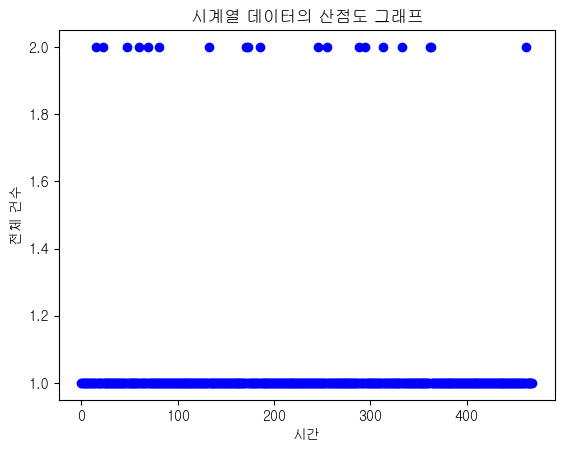

In [82]:
import matplotlib.pyplot as plt

# 주어진 데이터 프레임에서 시간에 해당하는 열을 x축으로, 시계열 데이터를 y축으로 선택
data_to_plot = 주거_강서_df1[주거_강서_df1['종료_대여소_ID']=='ST-2056']['전체_건수']

# 그래프 생성
plt.scatter(range(len(data_to_plot)), data_to_plot, color='blue', label='시계열 데이터')

# 그래프 제목, x축 및 y축 라벨 추가
plt.title('시계열 데이터의 산점도 그래프')
plt.xlabel('시간')
plt.ylabel('전체 건수')

# 그래프 표시
plt.show()

In [79]:
from pmdarima import auto_arima

result = []

# 주거 대여소의 시계열 분석

#for 주거_ID in 주거_IDs:
    
# 해당 주거 대여소의 데이터 추출
주거_data = 주거_강서_df1[주거_강서_df1['종료_대여소_ID'] == 'ST-2056']

# 기준_날짜를 날짜형 데이터로 변환
주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])

# 기준_날짜를 인덱스로 설정하고 일별로 집계
주거_data.set_index('기준_날짜', inplace=True)
arima_data = 주거_data.resample('D')['전체_건수'].sum()  # 일별 전체_건수 합계 집계

# ARIMA 모델의 최적 매개변수 찾기
model = auto_arima(arima_data, seasonal=True,m=5, D=1, trace=True, error_action='ignore', suppress_warnings=True)
# 최적 매개변수로 ARIMA 모델 학습
model_fit = model.fit(arima_data)

# 다음 시간대의 예측값 계산
forecast = model_fit.predict(n_periods=1)[0]
result.append(forecast)

print(f"대여소 의 다음 시간대 예측값: {forecast}")

C:\Users\ciw96\AppData\Local\Temp\ipykernel_43876\3679632164.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[5] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=1614.168, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=1519.029, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=1612.169, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=1605.129, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=1427.008, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=1361.754, Time=0.28 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,0,0)(2,1,2)[5] intercept   : AIC=1363.280, Time=0.40 sec
 ARIMA(1,0,0)(1,1,2)[5] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(2,1,1)[5] intercept   : AIC=1370.802, Time=0.20 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=1362.160, Time=0.32 sec
 ARIMA(1,0,1)(2,1,1)[5] intercept   : AIC=1362.379, Time=0.40 sec
 ARIMA(0,0,1)(2,1,1)[5] intercept   : AIC=1360.481, T

C:\Users\ciw96\AppData\Local\Temp\ipykernel_43876\3679632164.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.predict(n_periods=1)[0]


In [56]:
주거_강서_df1 = 주거_강서_df[주거_강서_df['시간대_구간'] == '06:00~10:00']
상업_강서_df1 = 상업_강서_df[상업_강서_df['시간대_구간'] == '06:00~10:00']
주거_강서_df2 = 주거_강서_df[주거_강서_df['시간대_구간'] == '17:00~21:00']
상업_강서_df2 = 상업_강서_df[상업_강서_df['시간대_구간'] == '17:00~21:00']
# 전체 파일에서 1차 전처리 (집계_기준 2개 -> 1개로 줄임, 사용량 =0)
주거_강서_df1 = 주거_강서_df1[(주거_강서_df1['전체_이용_분'] != 0) & (주거_강서_df1['전체_이용_거리'] != 0)]
상업_강서_df1 = 상업_강서_df1[(상업_강서_df1['전체_이용_분'] != 0) & (상업_강서_df1['전체_이용_거리'] != 0)]
주거_강서_df3 = 주거_강서_df1[(주거_강서_df1['전체_이용_분'] != 0) & (주거_강서_df1['전체_이용_거리'] != 0)]
상업_강서_df2 = 상업_강서_df2[(상업_강서_df2['전체_이용_분'] != 0) & (상업_강서_df2['전체_이용_거리'] != 0)]


# 주거_강서_df1 : 대여 ARIMA(4,0,0)(2,1,1)[5]
# 주거_강서_df1 : 반납 ARIMA(0,0,0)(2,1,0)[5]        ? 
# 주거_강서_df2 : 대여 ARIMA(2,0,3)(2,1,0)[5]   
# 주거_강서_df2 : 반납 ARIMA(0,0,1)(2,1,1)[5] 
# 상업_강서_df1 : 대여 ARIMA(4,0,2)(2,1,0)[5]
# 상업_강서_df1 : 반납 ARIMA(3,0,3)(1,1,0)[5] 
# 상업_강서_df2 : 대여 ARIMA(4,0,2)(2,1,0)[5]
# 상업_강서_df2 : 반납 ARIMA(4,0,2)(2,1,0)[5]


In [64]:
상업_강서_df1

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,시간대_구간
1612769,2023-04-03,820,ST-2031,ST-2044,4,11,2604,0,0,0,06:00~10:00
1612737,2023-04-03,935,ST-2031,ST-2033,3,17,1162,0,0,0,06:00~10:00
1612732,2023-04-03,840,ST-2031,ST-2044,3,8,629,0,0,0,06:00~10:00
1612731,2023-04-03,840,ST-2031,ST-2032,3,8,1587,0,0,0,06:00~10:00
1612727,2023-04-03,825,ST-2031,ST-2044,3,8,1127,0,0,0,06:00~10:00
...,...,...,...,...,...,...,...,...,...,...,...
3288180,2024-03-29,735,ST-3094,ST-2044,1,12,2240,4,0,0,06:00~10:00
3288169,2024-03-29,735,ST-2871,ST-1727,2,11,2501,4,0,0,06:00~10:00
3288133,2024-03-29,735,ST-2033,ST-2044,1,3,509,4,0,0,06:00~10:00
3288132,2024-03-29,735,ST-2033,ST-2031,1,4,950,4,0,0,06:00~10:00


In [72]:
from pmdarima import auto_arima

result = []

# 주거 대여소의 시계열 분석

#for 주거_ID in 주거_IDs:
    
# 해당 주거 대여소의 데이터 추출
주거_data = 주거_강서_df1[주거_강서_df1['종료_대여소_ID'] == 'ST-2031']

# 기준_날짜를 날짜형 데이터로 변환
주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])

# 기준_날짜를 인덱스로 설정하고 일별로 집계
주거_data.set_index('기준_날짜', inplace=True)
arima_data = 주거_data.resample('D')['전체_건수'].sum()  # 일별 전체_건수 합계 집계

# ARIMA 모델의 최적 매개변수 찾기
model = auto_arima(arima_data, seasonal=True, m=5, D=1, trace=True, error_action='ignore', suppress_warnings=True)
# 최적 매개변수로 ARIMA 모델 학습
model_fit = model.fit(arima_data)

# 다음 시간대의 예측값 계산
forecast = model_fit.predict(n_periods=1)[0]
result.append(forecast)

print(f"대여소 ST-2031의 다음 시간대 예측값: {forecast}")

C:\Users\ciw96\AppData\Local\Temp\ipykernel_43876\2810811870.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주거_data['기준_날짜'] = pd.to_datetime(주거_data['기준_날짜'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[5] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=3286.116, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=3154.080, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=3284.119, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=3243.627, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=3027.802, Time=0.20 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=3044.914, Time=0.31 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=2992.411, Time=0.33 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=3059.997, Time=0.19 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=2930.707, Time=0.63 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(2,1,2)[5] intercept   : AIC=inf, Time=0.85 s

C:\Users\ciw96\AppData\Local\Temp\ipykernel_43876\2810811870.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.predict(n_periods=1)[0]


In [30]:
check1 = pd.read_csv('tpss_bcycl_od_statnhm_20240401.csv',encoding='cp949')

주거_강서_df1 = 주거_강서_df[주거_강서_df['시간대_구간'] == '06:00~10:00']
# 전체 파일에서 1차 전처리 (집계_기준 2개 -> 1개로 줄임, 사용량 =0)
check1 = check1[check1['집계_기준'] != '도착시간']
check1 = check1[(check1['전체_이용_분'] != 0) & (check1['전체_이용_거리'] != 0)]
    
check1['시간대_구간'] = check1['기준_시간대'].apply(divide_time_range)



check1 = check1[check1['시간대_구간'] == '06:00~10:00']

for 주거_ID in 주거_IDs:
    check =  check1[check1['시작_대여소_ID']==주거_ID]['전체_건수'].sum()
    print(f"{주거_ID} :         실제값 : {check}  ")


ST-1253 :         실제값 : 32  
ST-1352 :         실제값 : 56  
ST-1645 :         실제값 : 54  
ST-2050 :         실제값 : 52  
ST-2056 :         실제값 : 34  
ST-2557 :         실제값 : 53  
ST-2965 :         실제값 : 54  


In [22]:
주거_강서_df1.head()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,시간대_구간
1599090,2023-04-03,745,ST-1645,ST-2056,1,6,1281,0,0,0,06:00~10:00
1601475,2023-04-03,955,ST-2557,ST-2047,1,10,1520,0,0,0,06:00~10:00
1601422,2023-04-03,950,ST-1352,ST-2035,1,6,1171,0,0,0,06:00~10:00
1601391,2023-04-03,945,ST-2056,ST-1514,1,5,736,0,0,0,06:00~10:00
1601369,2023-04-03,945,ST-1352,ST-1062,1,10,2071,0,0,0,06:00~10:00


In [23]:
주거_강서_df2.head()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,시간대_구간
